# Neighbor Joining

Usage examples. The distances may not be correct or make sense.

### https://en.wikipedia.org/wiki/Neighbor_joining#Example

In [1]:
%matplotlib inline

from random import randint

import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform

from neighbor_joining import neighbor_joining, rooted, get_points, get_points_circular, plot

Construct a tree structure from a distance matrix. The result is a dictionary `{index1: [[index2, distance], ...], ...}`.

In [2]:
d = np.array([[0, 5, 9, 9, 8],
              [5, 0, 10, 10, 9],
              [9, 10, 0, 8, 7],
              [9, 10, 8, 0, 3],
              [8, 9, 7, 3, 0]])
tree = neighbor_joining(d)
tree

{0: [[5, 2.0]],
 1: [[5, 3.0]],
 2: [[6, 4.0]],
 3: [[7, 2.0]],
 4: [[7, 1.0]],
 5: [[1, 3.0], [0, 2.0], [6, 3.0]],
 6: [[5, 3.0], [2, 4.0], [7, 2.0]],
 7: [[4, 1.0], [3, 2.0], [6, 2.0]]}

Make all connections one-directional and reachable from root. The root node is `0` by default but can be provided as the second argument.

**Note**: At the moment the root node doesn't get a label.

In [3]:
tree = rooted(tree)
tree

{0: [[5, 2.0]],
 1: [],
 2: [],
 3: [],
 4: [],
 5: [[1, 3.0], [6, 3.0]],
 6: [[2, 4.0], [7, 2.0]],
 7: [[4, 1.0], [3, 2.0]]}

Get coordinates of points. The result is a dictionary `{index: [x, y], ...}`. The root node is `0` by default but can be provided as the second argument. It must match the root that was given to `rooted`.

In [4]:
points = get_points(tree)
points

{0: array([0, 0]),
 1: array([ 0.12132034,  2.12132034]),
 2: array([-6.94974747,  0.70710678]),
 3: array([-2.70710678, -5.53553391]),
 4: array([-4.82842712, -4.82842712]),
 5: array([ -2.00000000e+00,   2.44929360e-16]),
 6: array([-4.12132034, -2.12132034]),
 7: array([-4.12132034, -4.12132034])}

Draws the tree. Keyword argument `classes` is a list of lists of indexes. Lists of indexes contain indexes of nodes of the same class. They will be colored with the same color. Keyword argument `labels` is a list of strings which are displayed on the plot next to nodes with corresponding indexes.

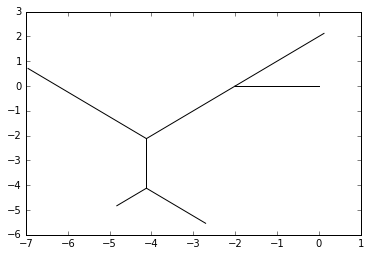

In [5]:
plot(tree, points)

### Iris

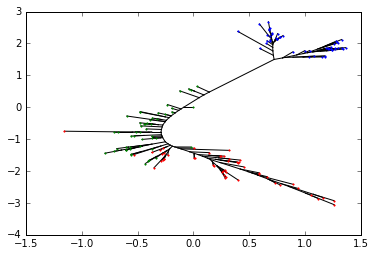

In [6]:
data = pd.read_csv("data/iris.tab", delimiter ="\t", header=None, skiprows=3,
                   names=["sepal length", "sepal width", "petal length", "petal width", "iris"])
data["iris"] = data["iris"].astype("category")

root = randint(0, len(data)) # the choice of a root affects how the plot looks

data.iloc[:,:4] = data.iloc[:,:4] - data.iloc[:,:4].mean()/data.iloc[:,:4].std()
d = squareform(pdist(data.iloc[:,:4], "euclidean"))
tree = rooted(neighbor_joining(d), root)
points = get_points(tree, root)
classes = list(data.groupby("iris").groups.values())

plot(tree, points, classes=classes)

### http://www.botany.wisc.edu/courses/botany_563/563_readings/Data%20for%20Phylogenetics.pdf

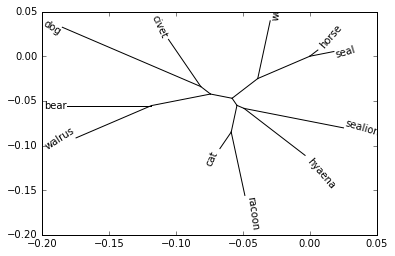

In [7]:
d = squareform([0.290,
               0.289, 0.028,
               0.297, 0.058, 0.055,
               0.270, 0.134, 0.135, 0.134,
               0.293, 0.156, 0.155, 0.161, 0.139,
               0.299, 0.148, 0.147, 0.154, 0.156, 0.130,
               0.288, 0.187, 0.188, 0.181, 0.185, 0.205, 0.205,
               0.250, 0.196, 0.194, 0.198, 0.179, 0.214, 0.208, 0.210,
               0.274, 0.207, 0.209, 0.205, 0.193, 0.221, 0.219, 0.217, 0.092,
               0.250, 0.202, 0.197, 0.199, 0.181, 0.214, 0.213, 0.202, 0.081, 0.092
               ])
labels = ["horse", "sealion", "walrus", "seal", "bear", "racoon", "weasel", "dog", "civet", "hyaena", "cat"]

root = len(d) # root currently doesn't get a label so it mustn't be a leaf
tree = rooted(neighbor_joining(d), root)
points = get_points(tree, root)
plot(tree, points, labels=labels)

### http://evolution.genetics.washington.edu/phylip/doc/distance.html

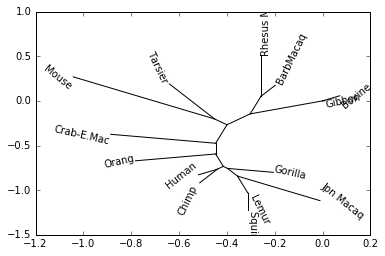

In [8]:
d = squareform([
    1.7043,
    2.0235, 1.1901,
    2.1378, 1.3287, 1.2905,
    1.5232, 1.2423, 1.3199, 1.7878,
    1.8261, 1.2508, 1.3887, 1.3137, 1.0642,
    1.9182, 1.2536, 1.4658, 1.3788, 1.1124, 0.1022,
    2.0039, 1.3066, 1.4826, 1.3826, 0.9832, 0.2061, 0.2681,
    1.9431, 1.2827, 1.4502, 1.4543, 1.0629, 0.3895, 0.3930, 0.3665,
    1.9663, 1.3296, 1.8708, 1.6683, 0.9228, 0.8035, 0.7109, 0.8132, 0.7858,
    2.0593, 1.2005, 1.5356, 1.6606, 1.0681, 0.7239, 0.7290, 0.7894, 0.7140, 0.7095,
    1.6664, 1.3460, 1.4577, 1.5935, 0.9127, 0.7278, 0.7412, 0.8763, 0.7966, 0.5959, 0.460,
    1.7320, 1.3757, 1.7803, 1.7119, 1.0635, 0.7899, 0.8742, 0.8868, 0.8288, 0.6213, 0.5065, 0.3502,
    1.7101, 1.3956, 1.6661, 1.7599, 1.0557, 0.6933, 0.7118, 0.7589, 0.8542, 0.5612, 0.4700, 0.3097, 0.2712,
])
labels = ["Mouse", "Bovine", "Lemur", "Tarsier", "Squir Monk", "Jpn Macaq", "Rhesus Mac",
          "Crab-E.Mac", "BarbMacaq", "Gibbon", "Orang", "Gorilla", "Chimp", "Human"]

root = len(d) # root currently doesn't get a label
tree = rooted(neighbor_joining(d), root)
min_dist = 1e-2
for l in tree.values():
    if len(l) >= 2:
        if l[0][1] < min_dist:
            l[1][1] += l[0][1] - min_dist
            l[0][1] = min_dist
        if l[1][1] < min_dist:
            l[0][1] += l[1][1] - min_dist
            l[1][1] = min_dist
        
points = get_points(tree, root)

plot(tree, points, labels=labels)

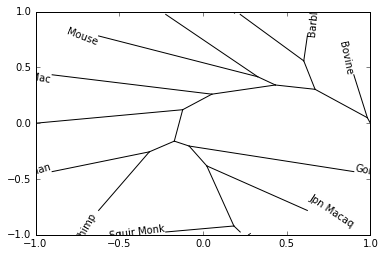

In [9]:
points = get_points_circular(tree, root)

plot(tree, points, labels=labels)